In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import reset_ramsey
from statsmodels.graphics.regressionplots import plot_partregress_grid
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import a CSV into a Pandas dataframe 
df = pd.read_csv('winequality.csv') # file name is wine quality
df.head() #Show  the top five rows

fixed acidity  volatile acidity  citric acid  residual sugar  density  \
0            7.4              0.70         0.00             1.9   0.9978   
1            7.8              0.88         0.00             2.6   0.9968   
2            7.8              0.76         0.04             2.3   0.9970   
3           11.2              0.28         0.56             1.9   0.9980   
4            7.4              0.70         0.00             1.9   0.9978   

     pH  sulphates  alcohol  
0  3.51       0.56      9.4  
1  3.20       0.68      9.8  
2  3.26       0.65      9.8  
3  3.16       0.58      9.8  
4  3.51       0.56      9.4

In [3]:
df.dtypes #Check the data types for each variable

fixed acidity       float64
volatile acidity    float64
citric acid         float64
residual sugar      float64
density             float64
pH                  float64
sulphates           float64
alcohol             float64
dtype: object

In [4]:
# this code is to calculate summary statistics 
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

           density           pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      0.996747     3.311113     0.658149    10.422983  
std       0.001887     0.154386     0.169507     1.065668  
min       0.990070     2.740000     0.330000     8.400000  
25%       0.995600     3.210000     0.550000     9.500000  
50%       0.996750     3.310000     0.620000    10.200000  
75%       0.997835     3.400000     0.730000    11.100000  
max       1.003690     4.010000     2.000000    14.900000

In [5]:
#Seaborn’s pairplot function to produce the big graphic plotting each variable against each other variable
sns.pairplot(df)

C:\Users\sidba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sidba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sidba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sidba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

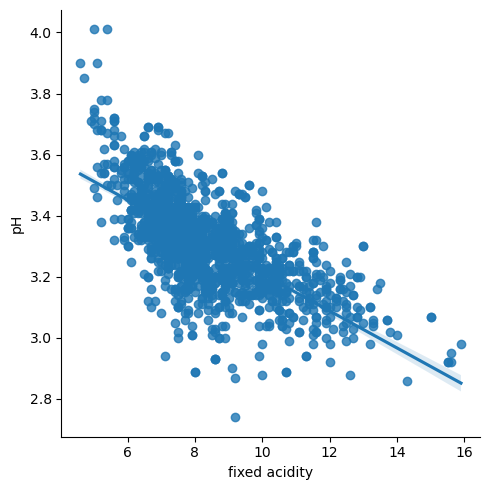

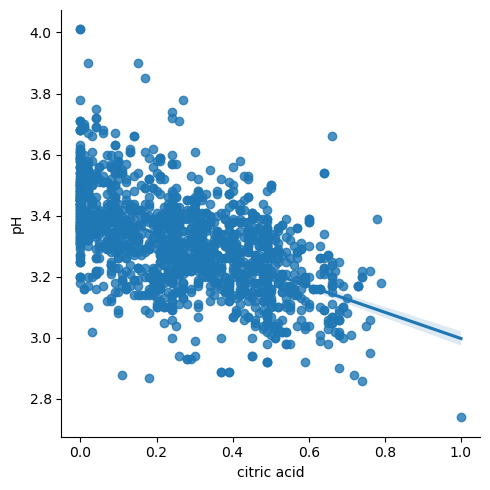

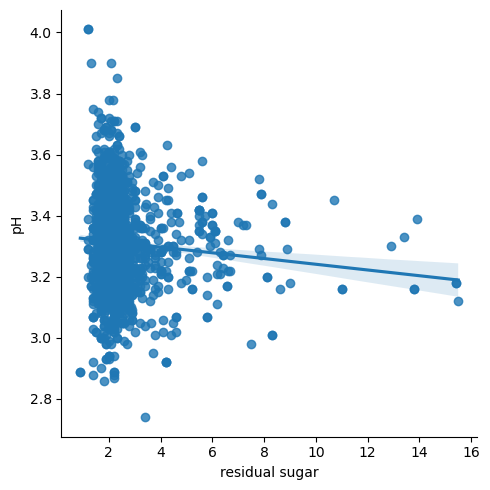

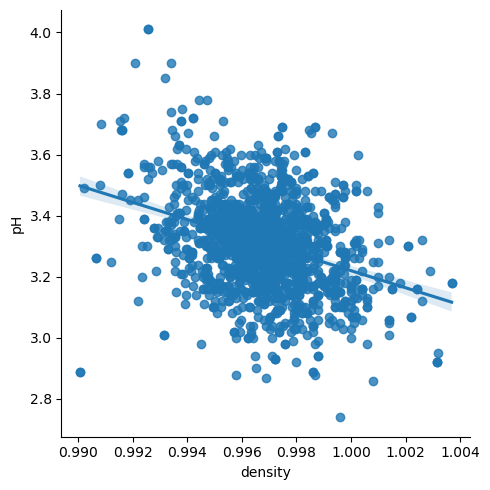

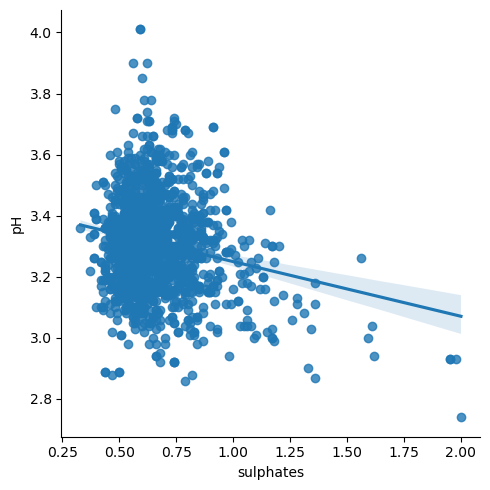

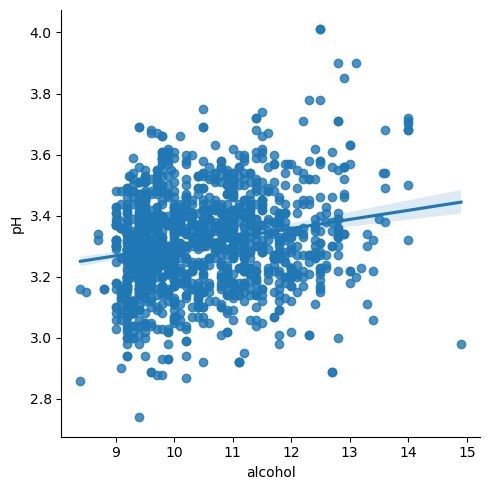

In [6]:
y = df['pH']
xvars = ['fixed acidity', 'volatile acidity','citric acid', 'residual sugar', 'density', 'sulphates', 'alcohol'] #  list of my independent variables
X = df[xvars]
# loop to create a plot of each one against your dependent variable
for i in xvars:
    sns.lmplot(x=i,y='pH', fit_reg=True, data=df)


In [7]:
#Add a constant to the independent variables data frame so that the regression includes an intercept term
X = sm.add_constant(X)
X.head()

const  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    1.0            7.4              0.70         0.00             1.9   
1    1.0            7.8              0.88         0.00             2.6   
2    1.0            7.8              0.76         0.04             2.3   
3    1.0           11.2              0.28         0.56             1.9   
4    1.0            7.4              0.70         0.00             1.9   

   density  sulphates  alcohol  
0   0.9978       0.56      9.4  
1   0.9968       0.68      9.8  
2   0.9970       0.65      9.8  
3   0.9980       0.58      9.8  
4   0.9978       0.56      9.4

In [8]:
model1 = sm.OLS.from_formula('pH ~ alcohol', df)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     70.51
Date:                Mon, 13 May 2024   Prob (F-statistic):           9.96e-17
Time:                        23:06:40   Log-Likelihood:                 753.57
No. Observations:                1599   AIC:                            -1503.
Df Residuals:                    1597   BIC:                            -1492.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0006      0.037     80.725      0.000       2.928       3.074
alcohol        0.0298      0.004      8.397      0.000       0.023       0.037
==============================================================================
Omnibus:                       13.867   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.731
Skew:                           0.068   Prob(JB):                     5.19e-05
Kurtosis:                       3.527   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model2 = sm.OLS.from_formula('pH ~ density', df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     211.1
Date:                Mon, 13 May 2024   Prob (F-statistic):           5.12e-45
Time:                        23:06:40   Log-Likelihood:                 818.29
No. Observations:                1599   AIC:                            -1633.
Df Residuals:                    1597   BIC:                            -1622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.1716      1.917     16.256      0.000      27.411      34.933
density      -27.9515      1.924    -14.530      0.000     -31.725     -24.178
==============================================================================
Omnibus:                       25.164   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.630
Skew:                           0.094   Prob(JB):                     5.53e-10
Kurtosis:                       3.778   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model3 = sm.OLS.from_formula('pH ~ sulphates', df)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     64.24
Date:                Mon, 13 May 2024   Prob (F-statistic):           2.11e-15
Time:                        23:06:40   Log-Likelihood:                 750.55
No. Observations:                1599   AIC:                            -1497.
Df Residuals:                    1597   BIC:                            -1486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4290      0.015    225.787      0.000       3.399       3.459
sulphates     -0.1791      0.022     -8.015      0.000      -0.223      -0.135
==============================================================================
Omnibus:                       47.371   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.096
Skew:                           0.312   Prob(JB):                     7.32e-15
Kurtosis:                       3.766   Cond. No.                         8.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#Comparing models

models = ['model1','model2','model3']
r_squared = [results1.rsquared, results2.rsquared, results3.rsquared]
adj_r_squared = [results1.rsquared_adj, results2.rsquared_adj, results3.rsquared_adj]
aic = [results1.aic, results2.aic, results3.aic]
bic = [results1.bic, results2.bic, results3.bic]

data = {
    'Model': models,
    'R-squared': r_squared,
    'Adjusted R-squared': adj_r_squared,
    'AIC': aic,
    'BIC': bic
}
df_stats = pd.DataFrame(data)

print(df_stats)

    Model  R-squared  Adjusted R-squared          AIC          BIC
0  model1   0.042285            0.041685 -1503.130882 -1492.376614
1  model2   0.116758            0.116205 -1632.572788 -1621.818521
2  model3   0.038670            0.038068 -1497.107562 -1486.353294


In [12]:
best_model_index = np.argmax(r_squared) 
best_model = [results1, results2, results3][best_model_index]

print(f"The best model among 3 is model {best_model_index +1}:")
print(best_model.summary())

The best model among 3 is model 2:
                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     211.1
Date:                Mon, 13 May 2024   Prob (F-statistic):           5.12e-45
Time:                        23:06:40   Log-Likelihood:                 818.29
No. Observations:                1599   AIC:                            -1633.
Df Residuals:                    1597   BIC:                            -1622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.

In [13]:
#Correlation matrix to check for multicollinearity.  >0.8 indicates a potential problem
X.corr() 

const  fixed acidity  volatile acidity  citric acid  \
const               NaN            NaN               NaN          NaN   
fixed acidity       NaN       1.000000         -0.256131     0.671703   
volatile acidity    NaN      -0.256131          1.000000    -0.552496   
citric acid         NaN       0.671703         -0.552496     1.000000   
residual sugar      NaN       0.114777          0.001918     0.143577   
density             NaN       0.668047          0.022026     0.364947   
sulphates           NaN       0.183006         -0.260987     0.312770   
alcohol             NaN      -0.061668         -0.202288     0.109903   

                  residual sugar   density  sulphates   alcohol  
const                        NaN       NaN        NaN       NaN  
fixed acidity           0.114777  0.668047   0.183006 -0.061668  
volatile acidity        0.001918  0.022026  -0.260987 -0.202288  
citric acid             0.143577  0.364947   0.312770  0.109903  
residual sugar          1.000000  0.355283   0.005527  0.042075  
density                 0.355283  1.000000   0.148506 -0.496180  
sulphates               0.005527  0.148506   1.000000  0.093595  
alcohol                 0.042075 -0.496180   0.093595  1.000000

C:\Users\sidba\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


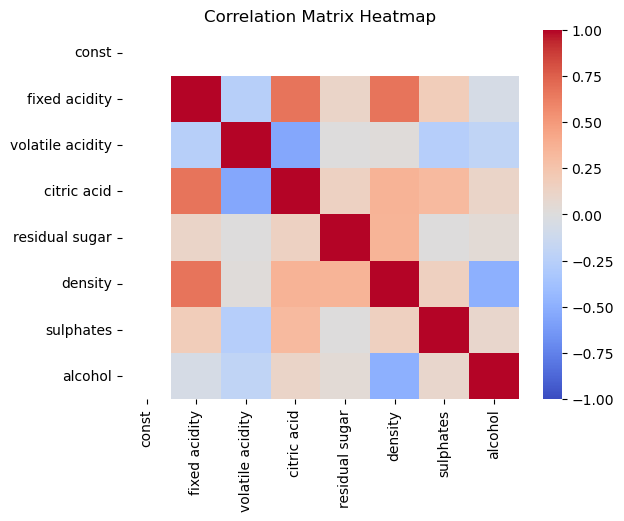

In [14]:
cor = X.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

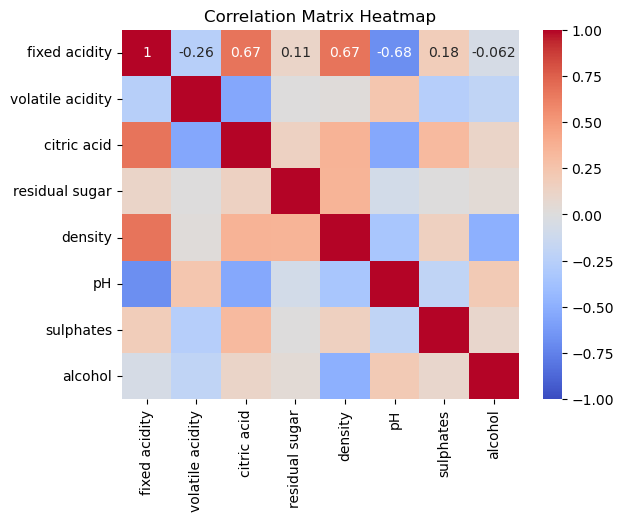

In [15]:
#Multicollinearity Check - Correlation Matrix of X in Heatmap Form!
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
#Variance Inflation Factor to check for multicollinearity
#A commonly used threshold is VIF > 5 or VIF > 10 to identify problematic multicollinearity.
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF) for Multicollinearity:")
print(vif)

Variance Inflation Factor (VIF) for Multicollinearity:
           Variable           VIF
0             const  1.185361e+06
1     fixed acidity  3.629117e+00
2  volatile acidity  1.596139e+00
3       citric acid  2.684667e+00
4    residual sugar  1.430725e+00
5           density  4.243265e+00
6         sulphates  1.177674e+00
7           alcohol  1.956720e+00


In [17]:
yhat1 = results1.fittedvalues
e1 = results1.resid


In [18]:
#Add fitted values and residuals to original dataframe for simplicity of plotting
df['yhat1'] = yhat1
df['e1'] = e1
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  density  \
0            7.4              0.70         0.00             1.9   0.9978   
1            7.8              0.88         0.00             2.6   0.9968   
2            7.8              0.76         0.04             2.3   0.9970   
3           11.2              0.28         0.56             1.9   0.9980   
4            7.4              0.70         0.00             1.9   0.9978   

     pH  sulphates  alcohol     yhat1        e1  
0  3.51       0.56      9.4  3.280638  0.229362  
1  3.20       0.68      9.8  3.292554 -0.092554  
2  3.26       0.65      9.8  3.292554 -0.032554  
3  3.16       0.58      9.8  3.292554 -0.132554  
4  3.51       0.56      9.4  3.280638  0.229362

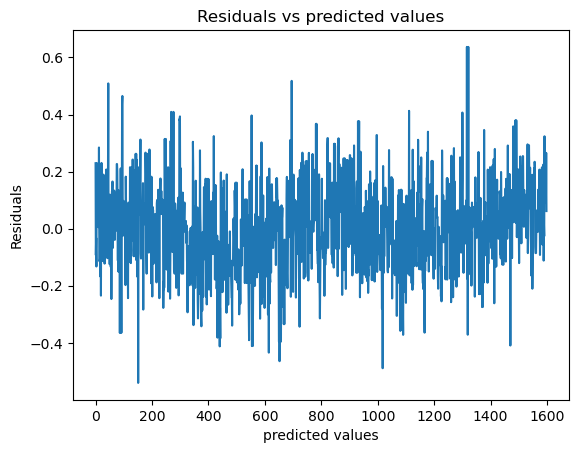

In [19]:
#scatterplot with the residuals on the y-axis and the predicted values on the x-axis
df['e1'].plot()
plt.title('Residuals vs predicted values')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.show()

-1.8141280292311502e-15


(array([  5.,  31., 123., 363., 481., 377., 171.,  38.,   8.,   2.]),
 array([-0.54063792, -0.422873  , -0.30510809, -0.18734317, -0.06957826,
         0.04818666,  0.16595157,  0.28371648,  0.4014814 ,  0.51924631,
         0.63701123]),
 <BarContainer object of 10 artists>)

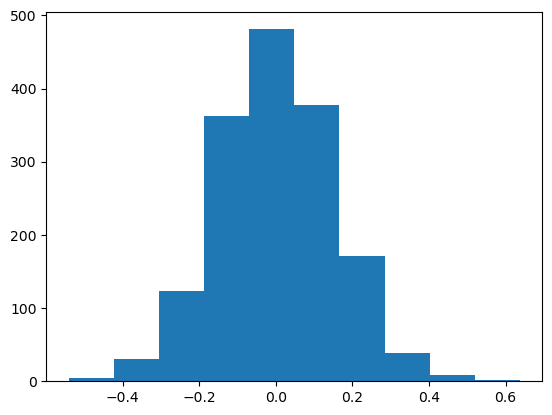

In [20]:
print(e1.mean())
plt.hist(e1)

In [21]:
shapiro_test = shapiro(e1)
shapiro_stat = shapiro_test[0]
shapiro_p = shapiro_test[1]

alpha = 0.05
shapiro_p < alpha

True

In [22]:
#QQ Plot for normality of residuals
sm.qqplot(results1.resid, line='s', dist=stats.norm)
plt.title("QQ Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [23]:
#Fitted values vs residuals to check for nonconstant error variance, aka heteroskedasticity
plt.scatter(yhat1, e1)
plt.show()

In [24]:
#Statistical tests for heteroskedasticity - Breusch Pagan and White
#HO: homoskedasticity, HA: heteroskedasticity
white_test = het_white(e1, X)
bp_test = het_breuschpagan(e1, X)
print("White's Test P-Value")
#print("LM Statistic:", white_test[0])
print("LM P-value:", white_test[1])
#print("F-Statistic:", white_test[2])
#print("F P-value:", white_test[3])
print("Breusch Pagan Test P-Value:")
print(bp_test[3])


White's Test P-Value
LM P-value: 3.375592946816721e-123
Breusch Pagan Test P-Value:
4.411788391244757e-22


In [25]:
sns.lmplot(x='yhat1',y='e1', fit_reg=True, data=df)

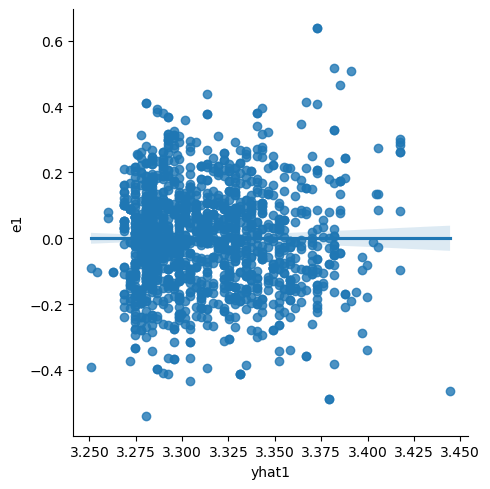

In [26]:
sns.lmplot(x='yhat1',y='e1', fit_reg=True, data=df)

In [27]:
#Outlier detection - Influence Plot - Leverage vs Studentized Residuals
sm.graphics.influence_plot(results1, criterion="cooks")

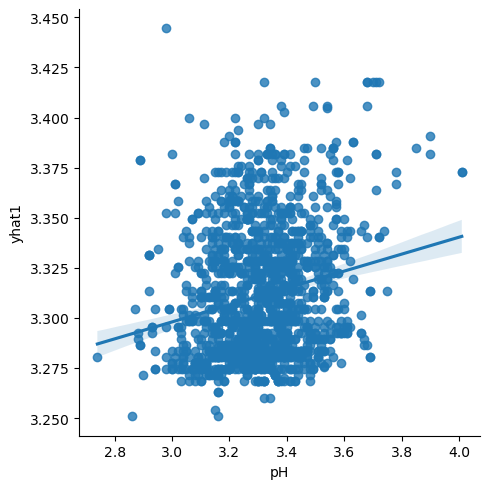

In [28]:
sns.lmplot(x='pH',y='yhat1', fit_reg=True, data=df) 

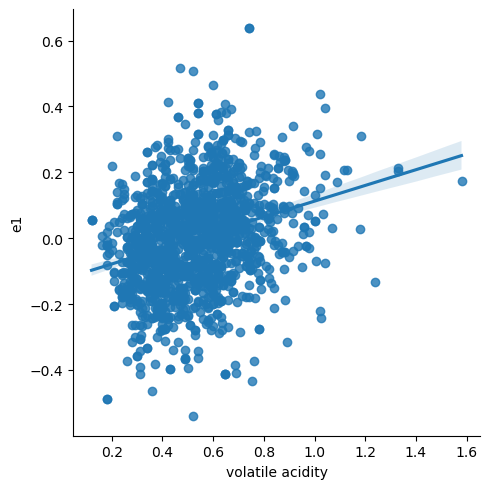

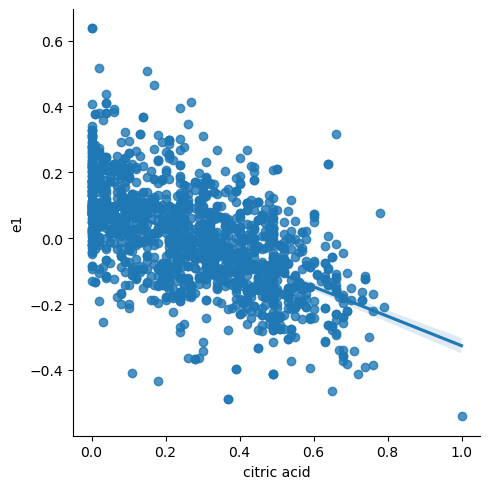

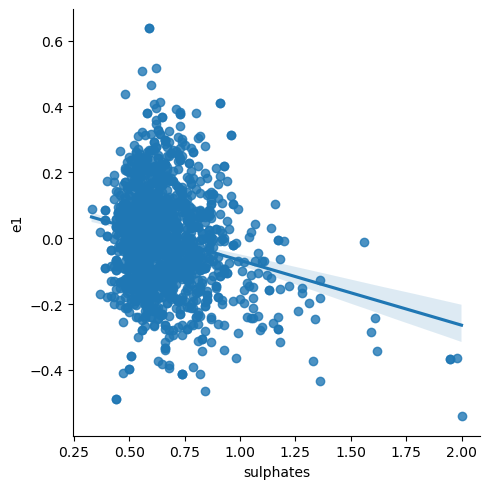

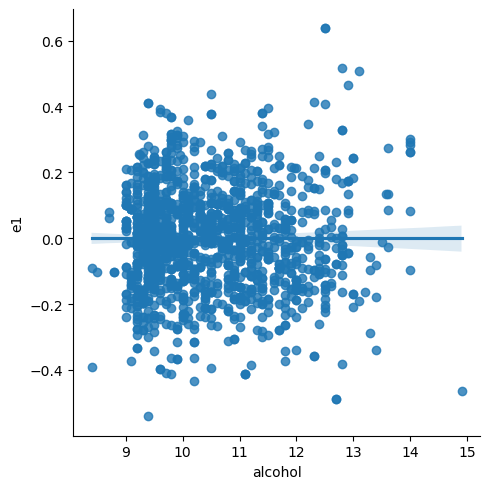

In [29]:
for i in xvars:
    sns.lmplot(x=i,y='e1', fit_reg=True, data=df)    

In [40]:
X.head()

const  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    1.0            7.4              0.70         0.00             1.9   
1    1.0            7.8              0.88         0.00             2.6   
2    1.0            7.8              0.76         0.04             2.3   
3    1.0           11.2              0.28         0.56             1.9   
4    1.0            7.4              0.70         0.00             1.9   

   density  sulphates  alcohol  
0   0.9978       0.56      9.4  
1   0.9968       0.68      9.8  
2   0.9970       0.65      9.8  
3   0.9980       0.58      9.8  
4   0.9978       0.56      9.4

In [42]:
# Create a new dataframe with five hypothetical observations’ worth of x-values and use the predict function to calculate the estimated y values for each set of x values

predictions = pd.DataFrame({
                            'fixed acidity': [8.4, 9.1, 10.3, 7.5, 6.7],
                            'volatile acidity':[0.80, 0.95, 0.99, 0.97, 0.96],
                            'citric acid': [0.01, 0.03,0.05,0.07,0.08],
                            'residual sugar':[1.9, 1.9, 2.2, 3.2, 3.2],
                            'density':[0.9999, 0.9876, 0.9978, 0.9977, 0.9954],
                            
                            'sulphates': [0.67, 0.59, 0.63, 0.68, 0.57],
                            'alcohol':[9.5, 9.7, 9.9, 9.3, 9.4],
                            
                           })

predictions['estimated '] = results2.predict(predictions)
print(predictions)

   fixed acidity  volatile acidity  citric acid  residual sugar  density  \
0            8.4              0.80         0.01             1.9   0.9999   
1            9.1              0.95         0.03             1.9   0.9876   
2           10.3              0.99         0.05             2.2   0.9978   
3            7.5              0.97         0.07             3.2   0.9977   
4            6.7              0.96         0.08             3.2   0.9954   

   sulphates  alcohol  estimated   
0       0.67      9.5    3.222973  
1       0.59      9.7    3.566776  
2       0.63      9.9    3.281671  
3       0.68      9.3    3.284466  
4       0.57      9.4    3.348755  
